# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Today
today = time.strftime("%m/%d/%y")


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Openweathermap API call: api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
base_url = "https://api.openweathermap.org/data/2.5/weather?q="

# DataFrame for Cities
weather_df = pd.DataFrame({"City":cities})

# Record and set count
Record = 0
Set = 1

# Placeholders for Latitude, Longitude, Temperature(F), Humidity (%), Cloudiness (%), Wind Speed (mph), Country, and DateTime
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Temperature (F)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Wind Speed (mph)"] = ""
weather_df["Country"] = ""
weather_df["DateTime"] = ""

# Printing for aestethics
print("Beginning Data Retrieval")
print("----------------------------")

# Initializing and completing requests
for index, city in enumerate(cities):
    
    print(f'Processing Record {Record} of set {Set} | {city}')
    
    try:
        
        requests_url = f'{base_url}{city}&appid={weather_api_key}'
        response = requests.get(requests_url).json()
    
        weather_df.loc[index, "Latitude"] = response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = response["coord"]["lon"]
        weather_df.loc[index, "Temperature (F)"] = 1.8 * (response["main"]["temp"] - 273) + 32
        weather_df.loc[index, "Humidity (%)"] = response["main"]["humidity"]
        weather_df.loc[index, "Cloudiness (%)"] = response["clouds"]["all"]
        weather_df.loc[index, "Wind Speed (mph)"] = response["wind"]["speed"]
        weather_df.loc[index, "Country"] = response['sys']["country"]
        weather_df.loc[index, "DateTime"] = datetime.datetime.fromtimestamp(response["dt"])
    
    except:
        print(f"City not found. Skipping | {city}")
        
    Record += 1
    
    if Record > 50:
        Set += 1
        Record = 0

print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")


Beginning Data Retrieval
----------------------------
Processing Record 0 of set 1 | baramati
Processing Record 1 of set 1 | hilo
Processing Record 2 of set 1 | avarua
Processing Record 3 of set 1 | kavaratti
Processing Record 4 of set 1 | oranjestad
Processing Record 5 of set 1 | barrow
Processing Record 6 of set 1 | chernyshevskiy
Processing Record 7 of set 1 | jamestown
Processing Record 8 of set 1 | esperance
Processing Record 9 of set 1 | rikitea
Processing Record 10 of set 1 | ushuaia
Processing Record 11 of set 1 | vestmannaeyjar
Processing Record 12 of set 1 | illoqqortoormiut
City not found. Skipping | illoqqortoormiut
Processing Record 13 of set 1 | mahebourg
Processing Record 14 of set 1 | mataura
Processing Record 15 of set 1 | omsukchan
Processing Record 16 of set 1 | rabo de peixe
Processing Record 17 of set 1 | shiyan
Processing Record 18 of set 1 | urengoy
Processing Record 19 of set 1 | sioux lookout
Processing Record 20 of set 1 | tomra
Processing Record 21 of set 1 |

Processing Record 31 of set 4 | saleaula
City not found. Skipping | saleaula
Processing Record 32 of set 4 | eyl
Processing Record 33 of set 4 | sorland
Processing Record 34 of set 4 | fairlie
Processing Record 35 of set 4 | san ignacio
Processing Record 36 of set 4 | nhulunbuy
Processing Record 37 of set 4 | bambous virieux
Processing Record 38 of set 4 | barentsburg
City not found. Skipping | barentsburg
Processing Record 39 of set 4 | severo-kurilsk
Processing Record 40 of set 4 | tiznit
Processing Record 41 of set 4 | yellowknife
Processing Record 42 of set 4 | diapaga
Processing Record 43 of set 4 | edd
Processing Record 44 of set 4 | atuona
Processing Record 45 of set 4 | saskylakh
Processing Record 46 of set 4 | kimbe
Processing Record 47 of set 4 | doha
Processing Record 48 of set 4 | tautira
Processing Record 49 of set 4 | madoc
Processing Record 50 of set 4 | raymore
Processing Record 0 of set 5 | batsfjord
Processing Record 1 of set 5 | nyagan
Processing Record 2 of set 5 | 

Processing Record 10 of set 8 | hirado
Processing Record 11 of set 8 | tselinnoye
Processing Record 12 of set 8 | barra
Processing Record 13 of set 8 | hirara
Processing Record 14 of set 8 | santa maria
Processing Record 15 of set 8 | guerrero negro
Processing Record 16 of set 8 | xudat
Processing Record 17 of set 8 | grand river south east
City not found. Skipping | grand river south east
Processing Record 18 of set 8 | najran
Processing Record 19 of set 8 | rassvet
Processing Record 20 of set 8 | coquimbo
Processing Record 21 of set 8 | laguna
Processing Record 22 of set 8 | camana
Processing Record 23 of set 8 | praya
Processing Record 24 of set 8 | buluang
Processing Record 25 of set 8 | cooma
Processing Record 26 of set 8 | viedma
Processing Record 27 of set 8 | ostrovnoy
Processing Record 28 of set 8 | praia da vitoria
Processing Record 29 of set 8 | sao filipe
Processing Record 30 of set 8 | borazjan
Processing Record 31 of set 8 | ko samui
Processing Record 32 of set 8 | qianan

Processing Record 44 of set 11 | clyde
Processing Record 45 of set 11 | bathsheba
Processing Record 46 of set 11 | odweyne
Processing Record 47 of set 11 | uvira
Processing Record 48 of set 11 | comodoro rivadavia
Processing Record 49 of set 11 | karauzyak
City not found. Skipping | karauzyak
Processing Record 50 of set 11 | yurimaguas
Processing Record 0 of set 12 | chahuites
Processing Record 1 of set 12 | teya
Processing Record 2 of set 12 | tosagua
Processing Record 3 of set 12 | palmer
Processing Record 4 of set 12 | vamvakou
Processing Record 5 of set 12 | angoche
Processing Record 6 of set 12 | tabuk
Processing Record 7 of set 12 | mackenzie
Processing Record 8 of set 12 | leh
Processing Record 9 of set 12 | allangigan
City not found. Skipping | allangigan
Processing Record 10 of set 12 | santiago de chuco
Processing Record 11 of set 12 | neyshabur
Processing Record 12 of set 12 | pauini
Processing Record 13 of set 12 | louisbourg
City not found. Skipping | louisbourg
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Exporting data to a CSV
weather_df.to_csv("../output_data/Weather Data.csv")

In [5]:
# Displaying Data count
weather_df.count()

City                632
Latitude            632
Longitude           632
Temperature (F)     632
Humidity (%)        632
Cloudiness (%)      632
Wind Speed (mph)    632
Country             632
DateTime            632
dtype: int64

In [6]:
# Converting strings to numeric floats and assigning to variables
latitude = pd.to_numeric(weather_df["Latitude"]).astype(float)
longitude = pd.to_numeric(weather_df['Longitude']).astype(float)
temperature = pd.to_numeric(weather_df["Temperature (F)"]).astype(float)
humidity = pd.to_numeric(weather_df['Humidity (%)']).astype(float)
wind_speed = pd.to_numeric(weather_df['Wind Speed (mph)']).astype(float)
cloudiness = pd.to_numeric(weather_df['Cloudiness (%)']).astype(float)

weather_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,DateTime
0,baramati,18.15,74.58,72.536,33,0,1.93,IN,2020-03-03 19:47:59
1,hilo,19.73,-155.09,70.106,88,90,1.5,US,2020-03-03 19:45:49
2,avarua,-21.21,-159.78,84.47,83,7,1.5,CK,2020-03-03 19:48:00
3,kavaratti,10.57,72.64,84.47,66,20,2.1,IN,2020-03-03 19:48:00
4,oranjestad,12.52,-70.03,80.87,69,20,8.2,AW,2020-03-03 19:45:59


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

From this graph one may see that as you approach the equator, the maximum temperature drastically increases.


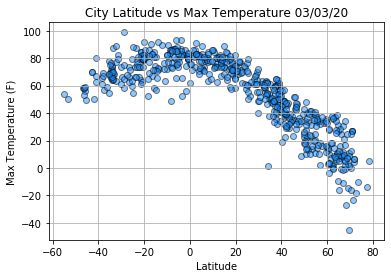

In [7]:
# Creating a scatter plot of the data
plt.scatter(latitude, temperature, facecolor = 'dodgerblue', edgecolors = 'black', alpha = 0.5)

# Setting labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature {today}')

# Adding grid
plt.grid()

# Analysis of the graph
print('From this graph one may see that as you approach the equator, the maximum temperature drastically increases.')

# Saving Figure
plt.savefig('../Graphs/Latitude vs Temperature Plot.png')

# Showing plot
plt.show()

#### Latitude vs. Humidity Plot

The regression does not display a strong correlation between the data sets.


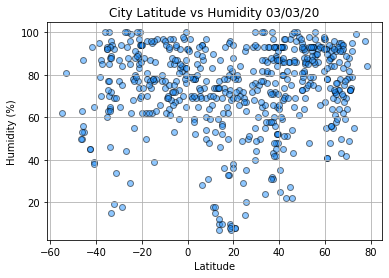

In [8]:
# Creating a scatter plot of the data
plt.scatter(latitude, humidity, facecolor = 'dodgerblue', edgecolors = 'black', alpha = 0.5)

# Setting labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity {today}')

# Adding grid
plt.grid()

# Analysis of the graph
print('The regression does not display a strong correlation between the data sets.')

# Saving Figure
plt.savefig('../Graphs/Latitude vs Humidity Plot.png')

# Showing plot
plt.show()

#### Latitude vs. Cloudiness Plot

The regression does not display a strong correlation between the data sets.


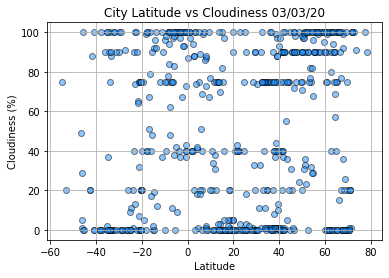

In [9]:
# Creating a scatter plot of the data
plt.scatter(latitude, cloudiness, facecolor = 'dodgerblue', edgecolors = 'black', alpha = 0.5)

# Setting labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {today}')

# Adding grid
plt.grid()

# Analysis of the graph
print('The regression does not display a strong correlation between the data sets.')

# Saving Figure
plt.savefig('../Graphs/Latitude vs Cloudiness Plot.png')

# Showing plot
plt.show()

#### Latitude vs. Wind Speed Plot

The regression does not display a strong correlation between the data sets.


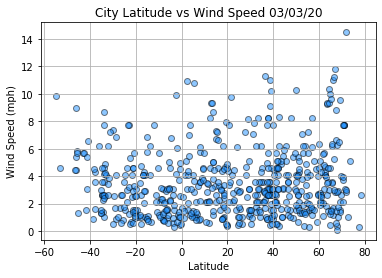

In [10]:
# Creating a scatter plot of the data
plt.scatter(latitude, wind_speed, facecolor = 'dodgerblue', edgecolors = 'black', alpha = 0.5)

# Setting labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed {today}')

# Adding grid
plt.grid()

# Analysis of the graph
print('The regression does not display a strong correlation between the data sets.')

# Saving Figure
plt.savefig('../Graphs/Latitude vs Wind Speed Plot.png')

# Showing plot
plt.show()

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :].reset_index(drop = True)
southern_hemisphere_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :].reset_index(drop = True)

In [12]:
# Converting strings to numeric floats and assigning to variables northern hemisphere
northern_latitude = northern_hemisphere_df["Latitude"].astype(float)
northern_longitude = northern_hemisphere_df['Longitude'].astype(float)
northern_temperature = northern_hemisphere_df["Temperature (F)"].astype(float)
northern_humidity = northern_hemisphere_df['Humidity (%)'].astype(float)
northern_wind_speed = northern_hemisphere_df['Wind Speed (mph)'].astype(float)
northern_cloudiness = northern_hemisphere_df['Cloudiness (%)'].astype(float)

# Converting strings to numeric floats and assigning to variables southern hemisphere
southern_latitude = southern_hemisphere_df["Latitude"].astype(float)
southern_longitude = southern_hemisphere_df['Longitude'].astype(float)
southern_temperature = southern_hemisphere_df["Temperature (F)"].astype(float)
southern_humidity = southern_hemisphere_df['Humidity (%)'].astype(float)
southern_wind_speed = southern_hemisphere_df['Wind Speed (mph)'].astype(float)
southern_cloudiness = southern_hemisphere_df['Cloudiness (%)'].astype(float)

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plot(x_value_args, y_value_args):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_args, y_value_args)
    regress_values = x_value_args * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    linear_regression_plot.line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    print(f'Regression line equation is: {line_eq}')
    plt.scatter(x_value_args, y_value_args, facecolor = 'dodgerblue', edgecolors = 'black', alpha = 0.5)
    plt.plot(x_value_args, regress_values, 'r-')
    print(f'The r-squared is: {rvalue}')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.19x + 91.14
The r-squared is: -0.9102381199188332
The regression displays a negative correlation between latitude and temperature. 
As you move away from the equator (Latitude = 0) the temperature decreases.


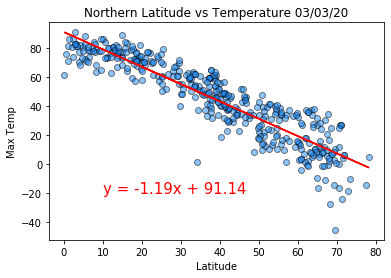

In [14]:
# Creating a scatter plot of the data
linear_regression_plot(northern_latitude, northern_temperature)

# Setting labels
plt.annotate(linear_regression_plot.line_eq,(10,-20),fontsize = 15, color ='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Northern Latitude vs Temperature {today}')

# Analysis of the graph
print('The regression displays a negative correlation between latitude and temperature. \nAs you move away from the equator (Latitude = 0) the temperature decreases.')

# Saving Figure
plt.savefig('../Graphs/Northen Hemisphere - Max Temp vs Latitude Linear Regression Plot.png')

# Showing plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.41x + 82.37
The r-squared is: 0.5209139350107316
The regression displays a positive correlation. 
As you move closer to the equator (Latitude = 0) the temperature incraeses.


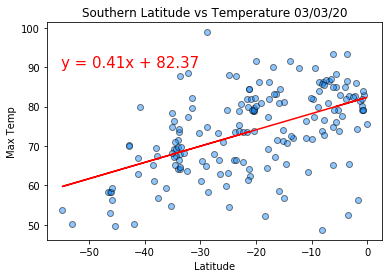

In [23]:
# Creating a scatter plot of the data
linear_regression_plot(southern_latitude, southern_temperature)

# Setting labels
plt.annotate(linear_regression_plot.line_eq,(-55,90),fontsize = 15, color ='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Southern Latitude vs Temperature {today}')

# Analysis of the graph
print('The regression displays a positive correlation. \nAs you move closer to the equator (Latitude = 0) the temperature incraeses.')

# Saving Figure
plt.savefig('../Graphs/Southern Hemisphere - Max Temp vs. Latitude Linear Regression Plot.png')

# Showing plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.27x + 61.54
The r-squared is: 0.265308418777821
The regression does not display any obvious correlations between the data sets.


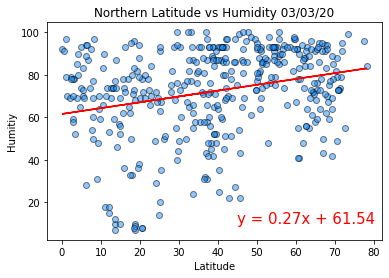

In [16]:
# Creating a scatter plot of the data
linear_regression_plot(northern_latitude, northern_humidity)

# Setting labels
plt.annotate(linear_regression_plot.line_eq,(45,10),fontsize = 15, color ='r')
plt.xlabel('Latitude')
plt.ylabel('Humitiy')
plt.title(f'Northern Latitude vs Humidity {today}')

# Analysis of the graph
print('The regression does not display any obvious correlations between the data sets.')

# Saving Figure
plt.savefig('../Graphs/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression Plot.png')

# Showing plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.32x + 83.54
The r-squared is: 0.24211121375801437
The correlation does not display any obvious correlations between the data sets.


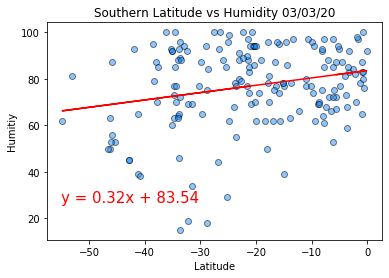

In [17]:
# Creating a scatter plot of the data
linear_regression_plot(southern_latitude, southern_humidity)

# Setting labels
plt.annotate(linear_regression_plot.line_eq,(-55,27),fontsize = 15, color ='r')
plt.xlabel('Latitude')
plt.ylabel('Humitiy')
plt.title(f'Southern Latitude vs Humidity {today}')

# Analysis of the graph
print('The correlation does not display any obvious correlations between the data sets.')

# Saving Figure
plt.savefig('../Graphs/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression Plot.png')

# Showing plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.44x + 31.59
The r-squared is: 0.22052545496079917
The regression does not display a strong correlation between the data sets.


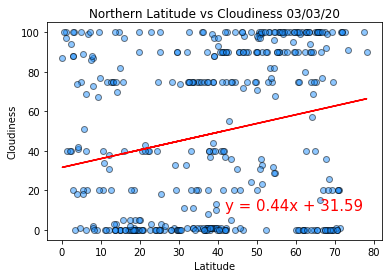

In [18]:
# Creating a scatter plot of the data
linear_regression_plot(northern_latitude, northern_cloudiness)

# Setting labels
plt.annotate(linear_regression_plot.line_eq,(42,10),fontsize = 15, color ='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Latitude vs Cloudiness {today}')

# Analysis of the graph
print('The regression does not display a strong correlation between the data sets.')

# Saving Figure
plt.savefig('../Graphs/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot.png')

# Showing plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 1.23x + 75.78
The r-squared is: 0.39477588208177067
The regression does not display a strong correlation between the data sets.


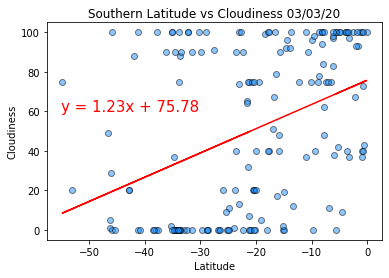

In [19]:
# Creating a scatter plot of the data
linear_regression_plot(southern_latitude, southern_cloudiness)

# Setting labels
plt.annotate(linear_regression_plot.line_eq,(-55,60),fontsize = 15, color ='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Latitude vs Cloudiness {today}')

# Analysis of the graph
print('The regression does not display a strong correlation between the data sets.')

# Saving Figure
plt.savefig('../Graphs/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot.png')

# Showing plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 3.19
The r-squared is: 0.09451308418678984
The regression does not display a strong correlation between the data sets.


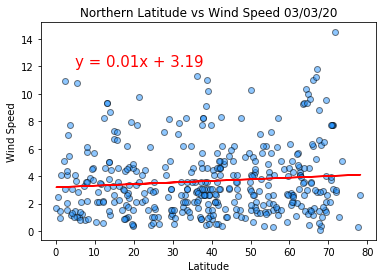

In [20]:
# Creating a scatter plot of the data
linear_regression_plot(northern_latitude, northern_wind_speed)

# Setting labels
plt.annotate(linear_regression_plot.line_eq,(5,12),fontsize = 15, color ='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Northern Latitude vs Wind Speed {today}')

# Analysis of the graph
print('The regression does not display a strong correlation between the data sets.')

# Saving Figure
plt.savefig('../Graphs/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression Plot.png')

# Showing plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.05x + 2.03
The r-squared is: -0.31244680647773987
The regression does not display a strong correlation between the data sets.


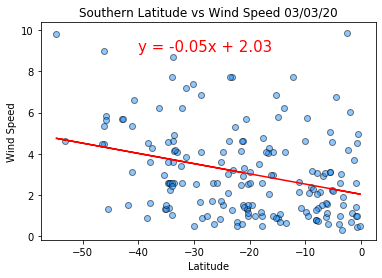

In [24]:
# Creating a scatter plot of the data
linear_regression_plot(southern_latitude, southern_wind_speed)

# Setting labels
plt.annotate(linear_regression_plot.line_eq,(-40,9),fontsize = 15, color ='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Southern Latitude vs Wind Speed {today}')

# Analysis of the graph
print('The regression does not display a strong correlation between the data sets.')

# Saving Figure
plt.savefig('../Graphs/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression Plot.png')

# Showing plot
plt.show()